In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import copy
import random
import math

In [ ]:
crx = pd.read_csv("crx.csv")
data = pd.read_csv("data.csv")

In [ ]:
def sign(z):
    if z > 0:
        return 1
    else:
        return -1

增加label(1/-1)

In [ ]:
for i in range(len(crx)):
  if crx["label"][i] == "+":
    crx["label"][i] = +1
  elif crx["label"][i] == "-":
    crx["label"][i] = -1
crx

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,att1,att2,att3,att4,att5,att6,att7,att8,att9,att10,att11,att12,att13,att14,att15,label
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202,0,1
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43,560,1
2,a,24.5,0.500,u,g,q,h,1.50,t,f,0,f,g,280,824,1
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100,3,1
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,260,0,-1
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,200,394,-1
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,200,1,-1
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,280,750,-1


In [ ]:
data["label"]=1
for i in range(len(data)):
  if data["Diagnosis"][i] == "M":
    data["label"][i] = 1
  elif data["Diagnosis"][i] == "B":
    data["label"][i] = -1
data["b"] = 1
data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,ID,Diagnosis,3,4,5,6,7,8,9,10,...,25,26,27,28,29,30,31,Unnamed: 31,label,b
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,1,1
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,1,1
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,1,1
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,1,1
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,1,1
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,1,1
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,1,1
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,1,1


#2

##data

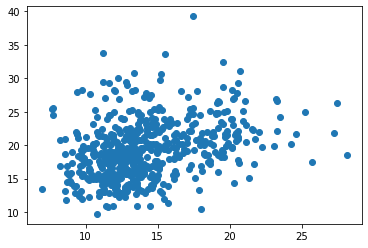

In [ ]:
x_1 = data[data.columns[2]]
label = data[data.columns[-1]]
y_1 = data[data.columns[3]]

plt.plot(x_1,y_1,"o")

In [ ]:
postive_x = list()
postive_y = list()
negative_x = list()
negative_y = list()

for index, lab in enumerate(label):
  if lab == -1:
    negative_x.append(x_1[index])
    negative_y.append(y_1[index])
  else:
    postive_x.append(x_1[index])
    postive_y.append(y_1[index])

[]

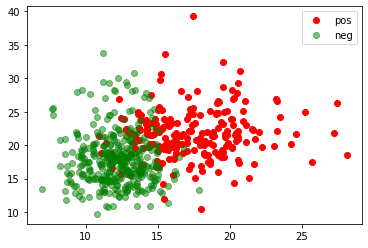

In [ ]:
plt.plot(postive_x,postive_y,"o", c="r", label="pos")
plt.plot(negative_x,negative_y,"o", c="g", label="neg", alpha=0.5)
plt.legend()
plt.plot()

##perceptron 更新權重

Y=WX

In [ ]:
error = 1
w = np.zeros(len(data.columns[2:4]))
data_x = data[data.columns[2:4]]
np_x = np.array(data_x)
data_y = data["label"]
np_y = np.array(data_y)
while error != 0:
  error = 0
  for i in range(len(data)):
    predict = 0
    x = np_x[i]
    y = np_y[i]
    # print(x)
    # print(y)
    for ii in range(len(np_x[i])):
      predict += sign(float(w[ii])*float(x[ii]))
    if predict*y <= 0:
      error += 1
      w += y*x
      print(w)

[17.99 10.38]
[ 4.45 -3.98]
[ -8.63 -19.69]
[ 6.71 -5.43]
[27.87 17.61]
[14.84 -0.81]
[29.83 24.39]
[21.634  7.55 ]
[ 9.584 -7.08 ]
[ -3.906 -29.38 ]
[ 14.314 -10.68 ]
[29.414 11.34 ]
[17.894 -7.41 ]
[37.104 11.16 ]
[24.054 -8.15 ]
[ 15.436 -19.94 ]
[  5.266 -34.82 ]
[ -3.332 -55.8  ]
[ 10.918 -33.65 ]
[  1.745 -47.51 ]
[ 14.425 -23.67 ]
[29.205  0.27 ]
[ 19.74 -20.74]
[  8.43 -39.78]
[ -0.599 -57.11 ]
[ 18.341 -35.8  ]
[  9.453 -50.44 ]
[ 26.653 -25.92 ]
[ 40.453 -10.13 ]
[ 28.143 -26.65 ]
[44.213 -7.   ]
[ 30.683 -17.94 ]
[48.733 -1.79 ]
[68.913 22.18 ]
[56.053  4.18 ]
[ 44.603 -16.79 ]
[ 31.263 -32.65 ]
[56.483 -7.74 ]
[75.583 18.55 ]
[63.583  2.9  ]
[ 51.223 -18.9  ]
[ 36.583 -34.14 ]
[ 21.963 -58.16 ]
[ 37.333 -35.4  ]
[ 24.063 -50.16 ]
[ 10.613 -68.46 ]
[ 25.673 -48.63 ]
[ 45.933 -25.6  ]
[ 33.753 -43.44 ]
[ 23.966 -63.38 ]
[ 12.366 -76.22 ]
[ 26.786 -56.45 ]
[ 40.396 -31.47 ]
[ 33.415 -44.9  ]
[ 21.235 -65.42 ]
[ 11.359 -84.82 ]
[   0.869 -104.11 ]
[ 13.979 -88.55 ]
[   2.339 -1

KeyboardInterrupt: ignored

#3

ŵ = ((X^TX)^-1)*X^T*Y

In [ ]:
X = np.matrix(data[data.columns[2:4]])
Y = np.matrix(data[data.columns[-1]])
X_T = X.T
Y_T = Y.T
X_inv = np.linalg.pinv(np.dot(X_T,X))

In [ ]:
w = X_inv*X_T*Y_T

In [ ]:
w

matrix([[ 0.07709937],
        [-0.06293188]])

In [ ]:
Y_np = np.array(data[data.columns[-1]])
Y_np

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1, -1, -1, -1,
       -1, -1,  1,  1, -1,  1,  1, -1, -1, -1, -1,  1, -1,  1,  1, -1, -1,
       -1, -1,  1, -1,  1,  1, -1,  1, -1,  1,  1, -1, -1, -1,  1,  1, -1,
        1,  1,  1, -1, -1, -1,  1, -1, -1,  1,  1, -1, -1, -1,  1,  1, -1,
       -1, -1, -1,  1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1,  1,  1,
        1, -1,  1,  1, -1, -1, -1,  1,  1, -1,  1, -1,  1,  1, -1,  1,  1,
       -1, -1,  1, -1, -1,  1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1,  1, -1, -1, -1, -1,  1,  1, -1,  1, -1, -1,  1,  1, -1,
       -1,  1,  1, -1, -1, -1, -1,  1, -1, -1,  1,  1,  1, -1,  1, -1,  1,
       -1, -1, -1,  1, -1, -1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,
       -1,  1, -1,  1, -1, -1,  1, -1,  1,  1,  1,  1, -1, -1,  1,  1, -1,
       -1, -1,  1, -1, -1

In [ ]:
correct = 0
for i in range(len(X)):
  result = sign(X[i]*w)
  if result*Y_np[i] >0:
    correct += 1
correct

371

2:是只對權重進行更新  =>  一定通過原點\
3:不只對權重進行分析，也會對截距進行更新  =>  不一定通過原點\
兩者的差別在於：分類器在分類時會考慮截距。\
有些資料可能在通過原點時，無法正確地做分類，而在不通過原點時，能做出正確的分類，因此會需要3中的方法進行分類，以達到準確地分類

#4

計算各個權重的使用數量

In [ ]:
V = [] #存放w
N = [] #存放w的使用次數
B = []
n = 1
w = np.zeros(len(data.columns[2:4]))
data_x = data[data.columns[2:4]]
np_x = np.array(data_x)
data_y = data["label"]
np_y = np.array(data_y)
b = 0
for i in range(len(data)):
  predict = 0
  x = np_x[i]
  y = np_y[i]
  # print(x)
  # print(y) 
  for ii in range(len(np_x[i])):
    predict += float(w[ii])*float(x[ii])+b
  if predict*y >0:
    n += 1
  elif predict*y <= 0:
    ww = copy.deepcopy(w)
    V.append(ww)
    N.append(n)
    B.append(b)
    n=1
    w += y*x
    b -= y
    # print(w)
    # print(b)

放入資料

P為正、負數量相加後之結果\
P的絕對值之數值越大，表示越多的權重指向同一個結果\
因為總數不變(測試資料數量不會改變)，因此將正負的數值相加後值可以直接得知投票的比例\
比例而正(=+1)負(=-1)表示其預測之結果

In [ ]:
data_x = data[data.columns[2:4]]
np_x = np.array(data_x)
data_y = data["label"]
np_y = np.array(data_y)
t = random.randint(0,len(np_x))
test_x = np_x[t]
P = 0

for i in range(len(V)):
  predict = 0
  for ii in range(len(test_x)):
    predict += V[i][ii]*test_x[ii]+B[i]
    # print(predict)
  P += sign(predict)*N[i]
print("predict:",P,'\n',"True_label",np_y[t])

predict: -41 
 True_label 1


In [ ]:
data_x = data[data.columns[2:4]]
np_x = np.array(data_x)
data_y = data["label"]
np_y = np.array(data_y)

P = 0

correct = 0
for iii in range(len(np_x)):
  for i in range(len(V)):
    predict = 0
    for ii in range(len(np_x[iii])):
      predict += V[i][ii]*test_x[ii]+B[i]
      # print(predict)
    P += sign(predict)*N[i]
  if P*np_y[iii] >0:
    correct += 1
correct

357

# 2、3、4比較
2：透過資料的輸，使得權重不斷更新，以得到分類界線\
3：使用最小平方法，直接得出誤差最小之邊界\
4：藉著2更新過程中所得到權重，進行投票，依投票結果來判斷

上述方法中，\
3最為直接，\
而4為2的進階版，可以用於無法完全分類時，作為替代使用

#5

In [ ]:
data_x = data[data.columns[2:4]]
np_x = np.array(data_x)
data_y = data["label"]
np_y = np.array(data_y)

P = []
S = []   # for 6

for i in range(len(V)):
  PP = []     #取w*x之絕對值
  SS = []
  for ii in range(len(np_x)):
    for iii in range(len(np_x[ii])):
      predict = 0
      if V[i][iii] == 0:
        pass
      else:
        V_std = V[i]/math.sqrt(sum(V[i]*V[i]))     #normalized
      predict += V_std[iii]*np_x[ii][iii]+B[i]    #計算權重與各點之距離
      # print(type(predict))
    if predict*np_y[ii] >= 1:
      PP.append(predict*np_y[ii])
      # print(PP)
    else:
      SS.append(-(predict*np_y[ii]))       #錯誤時的距離
  if len(PP) == 0:   #各權重最小距離(邊界)
    P.append(0)     #因為初始w為(0,0)，所以把此w之邊界設為0，使其不影響後續取最大邊界
  else:
    P.append(min(PP))
    SS2 = copy.deepcopy(SS)
    S.append(SS2)

In [ ]:
print(P.index(max(P))) #最大邊界index
print(max(P)) #最大邊界

153
13.005262443903224


In [ ]:
W5 = []
for i in range(len(V)):
  W5.append(sum(V[i]*V[i]))
print(W5.index(min(W5[1:])))   #||w|| 最小在index:2

2


#6

In [ ]:
S

In [ ]:
W6 = []
C = 1
for i in range(len(V)):
  W6.append(sum(V[i]*V[i])+sum(C*S[i]))
print(W6.index(min(W6)))

6


#7

In [ ]:
data_x = data[data.columns[2:4]]
np_x = np.array(data_x)
data_y = data["label"]
np_y = np.array(data_y)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(np_x, np_y, test_size=0.3, random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [ ]:
from sklearn import svm

clf = svm.SVC()
clf.fit(X_train_std,y_train)

SVC()

In [ ]:
y_pred = clf.predict(X_test_std)

In [ ]:
y_true = y_test

In [ ]:
error = 0
for i , v in enumerate(clf.predict(X_test_std)):
    if v != y_test[i]:
        error += 1
print(error)

16


In [ ]:
from matplotlib.colors import ListedColormap

In [ ]:
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.6, 
                    c=cmap(idx),
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)

    # highlight test samples
    if test_idx:
        # plot all samples
        if not versiontuple(np.__version__) >= versiontuple('1.9.0'):
            X_test, y_test = X[list(test_idx), :], y[list(test_idx)]
            warnings.warn('Please update to NumPy 1.9.0 or newer')
        else:
            X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    alpha=1.0,
                    edgecolor='black',
                    linewidths=1,
                    marker='o',
                    s=55, label='test set')

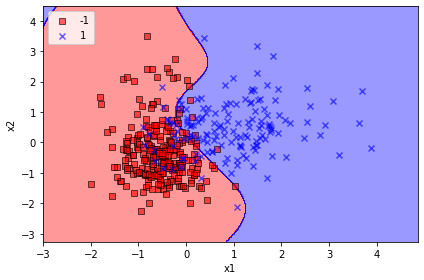

In [ ]:
plot_decision_regions(X_train_std, y_train, classifier=clf)
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()